In [1]:
!pip install --upgrade scikit-learn

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
 
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
 
torch.set_grad_enabled(True)
torch.set_printoptions(linewidth =120)
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix
 
import pdb

In [3]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # (1) input layer
        t = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t

In [4]:
#Downloading data from torchvision 
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

C:\Aanaconda\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
network = Network()
 
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader)) # Getting a batch
images, labels = batch

In [6]:
preds = network(images)
loss = F.cross_entropy(preds, labels) # Calculating the loss
 
loss.item()
 
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()
 
get_num_correct(preds, labels)
#Calculating the Gradients
network.conv1.weight.grad
 
loss.backward() 
 
network.conv1.weight.grad.shape
 
#Updating the Weights
optimizer = optim.Adam(network.parameters(), lr=0.01)
optimizer.step() # Updating the weights
 
preds = network(images)
loss.item()

C:\Aanaconda\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


2.290958881378174

In [7]:
#Train Using a Single Batch
network = Network()
 
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)
 
batch = next(iter(train_loader)) # Get Batch
images, labels = batch
 
preds = network(images) # Pass Batch
loss = F.cross_entropy(preds, labels) # Calculate Loss
 
loss.backward() # Calculate Gradients
optimizer.step() # Update Weights
 
print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss1: 2.3109445571899414
loss2: 2.271012783050537


In [8]:
network = Network()
 
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)
 
for epoch in range(1):
    
    total_loss = 0
    total_correct = 0
    
    for batch in train_loader: # Get Batch
        images, labels = batch
        print(labels)
 
        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss
 
        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights
 
        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)
 
    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8])
tensor([8, 0, 1, 1, 6, 8, 1, 9, 7, 8, 8, 9, 6, 6, 3, 1, 5, 4, 6, 7, 5, 5, 9, 2, 2, 2, 7, 6, 4, 1, 8, 7, 7, 5, 4, 2, 9,
        1, 7, 4, 6, 9, 7, 1, 8, 7, 1, 2, 8, 0, 9, 1, 8, 7, 0, 5, 8, 6, 7, 2, 0, 8, 7, 1, 6, 2, 1, 9, 6, 0, 1, 0, 5, 5,
        1, 7, 0, 5, 8, 4, 0, 4, 0, 6, 6, 4, 0, 0, 4, 7, 3, 0, 5, 8, 4, 1, 1, 2, 9, 2])
tensor([8, 5, 0, 6, 3, 4, 6, 0, 9, 1, 7, 3, 8, 5, 8, 3, 8, 5, 2, 0, 8, 7, 0, 3, 5, 0, 6, 5, 2, 7, 5, 2, 6, 8, 2, 6, 8,
        0, 4, 4, 4, 4, 4, 1, 5, 6, 5, 3, 3, 7, 3, 3, 6, 2, 8, 4, 6, 5, 9, 3, 2, 3, 2, 4, 4, 8, 2, 5, 3, 0, 7, 2, 0, 2,
        5, 7, 2, 3, 1, 7, 6, 2, 9, 1, 9, 1, 1, 8, 7, 8, 4, 2, 6, 6, 7, 9, 4, 6, 1, 9])
tensor([5, 6, 0, 5, 0, 1,

tensor([6, 0, 8, 3, 4, 9, 7, 1, 7, 9, 8, 6, 7, 4, 5, 0, 9, 1, 2, 6, 2, 0, 8, 3, 2, 3, 3, 7, 4, 4, 2, 7, 5, 5, 7, 6, 1,
        9, 4, 0, 4, 7, 1, 9, 4, 3, 6, 1, 7, 2, 6, 1, 4, 9, 0, 6, 8, 2, 6, 8, 6, 3, 5, 6, 1, 7, 5, 9, 3, 1, 1, 9, 6, 7,
        5, 9, 1, 4, 2, 8, 4, 5, 1, 1, 1, 4, 7, 2, 9, 9, 7, 1, 9, 4, 3, 0, 8, 1, 0, 8])
tensor([6, 1, 2, 8, 3, 4, 5, 0, 6, 4, 8, 5, 0, 6, 4, 4, 6, 3, 3, 6, 1, 5, 9, 3, 9, 4, 8, 9, 3, 6, 0, 3, 2, 2, 1, 5, 8,
        7, 8, 5, 9, 0, 9, 4, 3, 0, 5, 9, 6, 3, 1, 7, 3, 0, 2, 3, 3, 6, 9, 0, 8, 8, 8, 8, 1, 3, 7, 7, 8, 7, 2, 7, 0, 4,
        6, 6, 3, 8, 5, 1, 8, 1, 8, 2, 9, 4, 2, 4, 6, 1, 5, 7, 8, 9, 8, 0, 5, 1, 6, 1])
tensor([3, 8, 4, 3, 9, 5, 6, 5, 1, 0, 7, 6, 2, 3, 6, 9, 4, 3, 9, 5, 3, 3, 4, 7, 7, 6, 7, 2, 7, 3, 2, 3, 0, 0, 9, 7, 9,
        8, 9, 6, 8, 7, 4, 6, 9, 3, 9, 6, 3, 1, 6, 9, 9, 3, 9, 6, 2, 9, 5, 4, 4, 3, 6, 6, 7, 3, 3, 3, 7, 7, 6, 6, 5, 8,
        1, 0, 2, 1, 5, 5, 4, 5, 7, 8, 1, 4, 4, 0, 2, 6, 9, 3, 1, 6, 6, 7, 0, 9, 4, 9])
tensor([6, 7, 6, 7, 7, 2,

tensor([0, 8, 0, 4, 1, 5, 2, 8, 8, 5, 3, 4, 3, 5, 2, 2, 8, 1, 9, 6, 7, 1, 6, 9, 7, 7, 4, 6, 5, 6, 2, 5, 5, 8, 7, 0, 1,
        9, 7, 5, 8, 9, 9, 4, 6, 6, 5, 0, 8, 9, 4, 4, 3, 5, 0, 4, 9, 4, 8, 3, 8, 7, 6, 2, 9, 0, 0, 3, 0, 8, 4, 5, 0, 1,
        9, 3, 7, 3, 9, 1, 3, 4, 7, 4, 6, 8, 9, 8, 7, 4, 0, 6, 7, 7, 4, 2, 8, 2, 0, 4])
tensor([3, 6, 7, 5, 7, 7, 5, 1, 2, 0, 7, 2, 9, 4, 2, 5, 4, 9, 6, 6, 0, 4, 6, 6, 2, 9, 9, 9, 3, 0, 3, 4, 4, 5, 5, 5, 7,
        8, 7, 3, 3, 7, 8, 7, 3, 7, 4, 6, 1, 7, 9, 1, 2, 0, 2, 4, 1, 0, 0, 4, 2, 9, 2, 5, 2, 0, 8, 8, 0, 8, 1, 2, 2, 3,
        0, 9, 6, 5, 9, 8, 3, 3, 4, 5, 2, 5, 1, 9, 5, 4, 2, 5, 9, 2, 4, 3, 1, 0, 4, 4])
tensor([0, 0, 0, 3, 6, 1, 7, 2, 1, 6, 8, 1, 0, 2, 5, 6, 6, 2, 4, 5, 4, 9, 3, 2, 9, 6, 4, 9, 3, 5, 2, 9, 2, 0, 8, 7, 5,
        7, 3, 0, 5, 1, 6, 5, 0, 6, 9, 3, 3, 2, 1, 9, 7, 6, 9, 8, 7, 0, 3, 0, 8, 3, 4, 6, 5, 0, 9, 4, 7, 2, 4, 9, 6, 0,
        3, 5, 2, 0, 9, 1, 0, 5, 2, 9, 3, 0, 2, 8, 8, 7, 0, 6, 2, 2, 0, 3, 4, 5, 2, 4])
tensor([7, 4, 9, 8, 5, 6,

tensor([0, 7, 4, 0, 7, 7, 5, 6, 1, 8, 2, 3, 7, 4, 0, 8, 6, 1, 9, 4, 1, 5, 9, 1, 2, 1, 6, 4, 7, 5, 6, 1, 1, 1, 8, 3, 9,
        2, 1, 9, 8, 6, 8, 4, 8, 2, 1, 5, 0, 4, 7, 2, 3, 9, 2, 8, 1, 3, 9, 8, 3, 7, 9, 7, 2, 0, 8, 2, 1, 6, 8, 4, 2, 2,
        3, 4, 5, 5, 4, 8, 3, 3, 2, 2, 7, 4, 8, 6, 6, 7, 2, 1, 7, 1, 5, 8, 1, 3, 6, 6])
tensor([1, 0, 3, 6, 7, 9, 6, 7, 2, 6, 5, 5, 1, 8, 1, 3, 3, 4, 9, 4, 7, 1, 9, 4, 1, 9, 6, 7, 6, 6, 2, 1, 4, 8, 7, 9, 9,
        7, 5, 0, 1, 0, 1, 9, 0, 5, 6, 8, 9, 5, 2, 9, 4, 5, 9, 5, 0, 8, 0, 1, 4, 0, 8, 7, 5, 4, 5, 8, 4, 6, 8, 5, 2, 3,
        5, 0, 6, 1, 2, 0, 0, 8, 5, 9, 7, 6, 8, 7, 2, 5, 7, 5, 3, 1, 6, 4, 5, 1, 9, 3])
tensor([5, 9, 5, 4, 9, 3, 2, 3, 6, 7, 8, 6, 2, 8, 8, 4, 9, 8, 4, 6, 4, 4, 3, 2, 6, 3, 7, 2, 9, 9, 0, 4, 4, 3, 3, 6, 6,
        6, 1, 7, 6, 6, 3, 6, 3, 3, 9, 3, 5, 6, 7, 0, 3, 7, 8, 3, 0, 0, 3, 8, 0, 5, 5, 0, 9, 5, 8, 9, 4, 9, 0, 8, 2, 1,
        3, 1, 1, 6, 0, 8, 8, 1, 8, 9, 9, 4, 6, 1, 0, 6, 8, 4, 2, 4, 8, 9, 6, 3, 8, 9])
tensor([5, 7, 3, 1, 0, 0,

tensor([3, 6, 7, 9, 7, 1, 3, 7, 8, 4, 8, 4, 3, 6, 6, 4, 4, 3, 2, 4, 4, 9, 7, 5, 9, 9, 3, 0, 2, 6, 7, 6, 8, 0, 2, 2, 9,
        6, 0, 1, 9, 3, 3, 9, 0, 9, 1, 4, 5, 4, 4, 9, 7, 8, 7, 5, 0, 4, 4, 8, 8, 5, 7, 4, 8, 9, 3, 9, 4, 6, 7, 8, 9, 0,
        5, 6, 2, 2, 3, 5, 4, 4, 3, 7, 8, 2, 5, 6, 6, 1, 8, 7, 2, 4, 2, 8, 4, 0, 2, 2])
tensor([7, 4, 0, 9, 9, 1, 3, 5, 4, 7, 3, 8, 5, 3, 6, 9, 6, 1, 9, 7, 0, 4, 0, 8, 2, 7, 6, 6, 0, 4, 8, 6, 2, 5, 8, 4, 7,
        0, 8, 2, 3, 8, 8, 3, 6, 4, 2, 5, 0, 0, 5, 1, 9, 8, 5, 8, 8, 7, 3, 5, 9, 8, 2, 1, 9, 2, 3, 4, 8, 3, 6, 8, 0, 7,
        3, 6, 6, 7, 3, 8, 1, 0, 1, 4, 0, 2, 0, 8, 8, 7, 8, 6, 5, 6, 9, 6, 9, 2, 5, 5])
tensor([8, 2, 2, 0, 4, 4, 5, 6, 1, 1, 6, 5, 7, 9, 8, 2, 0, 5, 9, 6, 9, 0, 6, 8, 1, 1, 5, 0, 5, 2, 5, 0, 0, 9, 5, 1, 0,
        2, 6, 7, 7, 9, 4, 1, 0, 1, 0, 9, 9, 1, 6, 2, 8, 1, 4, 2, 9, 8, 0, 9, 0, 6, 5, 6, 4, 5, 7, 3, 3, 5, 9, 8, 6, 1,
        6, 9, 5, 3, 8, 8, 1, 6, 9, 5, 1, 4, 6, 4, 1, 4, 3, 8, 7, 6, 5, 1, 8, 5, 8, 3])
tensor([7, 9, 2, 7, 6, 7,

tensor([0, 6, 0, 6, 7, 7, 9, 5, 3, 1, 1, 3, 2, 8, 1, 5, 8, 6, 5, 6, 8, 3, 2, 3, 5, 7, 1, 7, 4, 4, 7, 4, 0, 7, 9, 5, 7,
        2, 9, 4, 4, 9, 5, 7, 5, 9, 1, 5, 0, 0, 3, 6, 3, 2, 0, 5, 3, 8, 8, 6, 7, 6, 2, 1, 6, 2, 8, 2, 8, 9, 1, 4, 2, 3,
        4, 1, 8, 3, 2, 2, 6, 5, 7, 9, 2, 8, 8, 8, 1, 7, 8, 9, 4, 5, 3, 1, 0, 6, 5, 0])
tensor([1, 0, 2, 5, 6, 4, 8, 3, 6, 7, 7, 1, 8, 9, 2, 7, 8, 5, 8, 9, 2, 5, 9, 6, 3, 7, 8, 9, 1, 3, 0, 2, 0, 8, 1, 0, 5,
        4, 9, 3, 1, 1, 6, 7, 0, 3, 0, 9, 9, 6, 2, 6, 8, 0, 7, 4, 4, 8, 4, 4, 9, 6, 2, 8, 4, 8, 9, 6, 0, 3, 4, 1, 7, 2,
        6, 3, 5, 2, 2, 5, 9, 2, 2, 4, 7, 9, 1, 9, 6, 3, 4, 8, 8, 7, 0, 7, 9, 7, 3, 4])
tensor([3, 4, 0, 2, 2, 9, 9, 4, 3, 5, 1, 5, 5, 4, 7, 3, 7, 1, 6, 2, 2, 6, 6, 9, 7, 9, 1, 6, 2, 4, 8, 0, 6, 9, 9, 2, 3,
        1, 3, 3, 2, 5, 0, 7, 5, 4, 9, 9, 8, 6, 7, 9, 0, 8, 8, 2, 3, 9, 4, 4, 8, 2, 2, 3, 9, 9, 5, 9, 4, 5, 5, 0, 9, 3,
        0, 1, 3, 8, 9, 0, 4, 2, 7, 6, 9, 1, 1, 6, 3, 9, 6, 9, 1, 8, 6, 6, 6, 7, 9, 9])
tensor([9, 8, 6, 8, 4, 3,

tensor([5, 2, 5, 4, 0, 2, 4, 2, 2, 3, 2, 1, 2, 3, 8, 7, 9, 4, 8, 7, 2, 5, 9, 3, 8, 6, 7, 7, 9, 8, 6, 2, 1, 4, 0, 7, 8,
        3, 6, 4, 0, 6, 0, 6, 8, 4, 4, 7, 7, 0, 7, 3, 8, 4, 6, 3, 8, 3, 8, 7, 8, 4, 9, 5, 3, 6, 6, 5, 4, 7, 3, 7, 8, 1,
        5, 1, 7, 3, 8, 5, 3, 8, 7, 2, 5, 5, 1, 5, 2, 8, 4, 4, 7, 5, 1, 2, 3, 2, 1, 7])
tensor([1, 0, 9, 5, 2, 9, 6, 1, 3, 9, 7, 7, 9, 5, 2, 0, 0, 1, 0, 6, 4, 4, 3, 7, 7, 6, 0, 1, 1, 3, 1, 4, 4, 6, 8, 9, 7,
        0, 5, 2, 9, 3, 0, 2, 0, 7, 9, 9, 0, 6, 8, 0, 5, 7, 3, 7, 1, 6, 1, 7, 6, 3, 5, 7, 3, 1, 4, 1, 3, 4, 6, 3, 2, 7,
        6, 7, 8, 3, 0, 9, 7, 9, 1, 4, 1, 8, 3, 8, 6, 3, 8, 1, 1, 6, 3, 4, 9, 1, 3, 0])
tensor([9, 6, 7, 9, 3, 3, 4, 0, 0, 2, 6, 4, 7, 3, 4, 7, 2, 7, 5, 7, 3, 8, 2, 7, 6, 6, 7, 9, 3, 7, 8, 0, 3, 0, 8, 2, 2,
        2, 8, 5, 9, 7, 0, 9, 8, 8, 6, 2, 6, 2, 9, 9, 7, 5, 2, 7, 4, 5, 4, 6, 1, 3, 1, 7, 0, 3, 0, 9, 7, 7, 0, 8, 5, 2,
        7, 2, 6, 5, 0, 7, 0, 5, 2, 1, 7, 7, 7, 3, 1, 9, 7, 1, 6, 3, 1, 4, 1, 6, 8, 9])
tensor([1, 0, 5, 2, 7, 8,

tensor([7, 8, 8, 4, 5, 1, 6, 9, 2, 9, 1, 7, 5, 0, 6, 0, 5, 0, 4, 7, 1, 5, 2, 0, 5, 6, 4, 2, 4, 3, 8, 6, 9, 8, 8, 2, 3,
        7, 3, 9, 6, 4, 5, 4, 9, 1, 9, 2, 5, 0, 4, 5, 4, 5, 5, 3, 9, 7, 4, 2, 0, 7, 1, 7, 8, 4, 0, 3, 7, 7, 9, 0, 5, 4,
        4, 5, 1, 4, 2, 6, 8, 2, 1, 5, 3, 4, 7, 2, 2, 8, 1, 2, 6, 5, 6, 9, 7, 8, 7, 3])
tensor([8, 0, 1, 2, 1, 8, 9, 6, 8, 1, 0, 2, 6, 8, 3, 2, 8, 7, 2, 9, 5, 3, 7, 4, 4, 4, 7, 1, 3, 3, 2, 2, 7, 5, 5, 8, 9,
        0, 0, 1, 6, 3, 5, 9, 4, 8, 1, 1, 7, 7, 5, 6, 4, 7, 6, 4, 8, 9, 2, 3, 3, 7, 5, 7, 5, 0, 7, 8, 2, 0, 6, 8, 6, 6,
        2, 6, 1, 4, 6, 7, 1, 0, 0, 6, 3, 6, 4, 5, 1, 3, 7, 0, 9, 8, 5, 2, 3, 5, 4, 9])
tensor([7, 1, 9, 6, 1, 7, 5, 4, 3, 0, 0, 5, 5, 2, 3, 5, 0, 3, 5, 1, 1, 7, 3, 0, 6, 4, 6, 7, 3, 6, 4, 9, 3, 5, 8, 2, 8,
        1, 7, 4, 2, 9, 6, 6, 8, 3, 3, 7, 0, 2, 6, 0, 8, 4, 9, 9, 8, 3, 1, 2, 7, 4, 6, 1, 6, 1, 3, 4, 6, 9, 5, 2, 5, 9,
        3, 7, 1, 5, 2, 4, 5, 6, 9, 5, 6, 5, 2, 8, 5, 4, 6, 4, 6, 7, 0, 6, 0, 1, 8, 8])
tensor([7, 6, 8, 2, 1, 6,

tensor([8, 4, 0, 4, 9, 2, 7, 3, 9, 2, 8, 1, 7, 1, 4, 2, 4, 6, 4, 6, 0, 0, 4, 4, 1, 2, 3, 9, 2, 5, 2, 0, 9, 6, 0, 1, 0,
        7, 8, 7, 4, 3, 0, 4, 1, 2, 3, 8, 1, 3, 9, 5, 9, 7, 4, 6, 4, 3, 7, 1, 7, 5, 4, 5, 5, 7, 7, 2, 0, 6, 3, 5, 0, 6,
        7, 9, 6, 9, 1, 5, 2, 3, 6, 1, 4, 3, 2, 2, 0, 9, 9, 7, 8, 6, 5, 3, 8, 4, 8, 2])
tensor([0, 7, 5, 0, 7, 4, 9, 7, 4, 3, 5, 5, 6, 6, 0, 3, 8, 7, 7, 6, 2, 4, 8, 2, 4, 7, 1, 3, 1, 0, 6, 0, 6, 2, 4, 3, 2,
        0, 9, 2, 9, 4, 8, 1, 2, 2, 6, 4, 0, 8, 0, 0, 2, 3, 4, 8, 7, 6, 7, 7, 8, 0, 0, 2, 7, 8, 7, 2, 6, 5, 5, 6, 5, 8,
        4, 7, 9, 1, 7, 6, 1, 5, 3, 4, 4, 1, 7, 8, 1, 7, 9, 9, 3, 9, 7, 0, 5, 1, 2, 8])
tensor([2, 4, 2, 7, 2, 0, 7, 3, 7, 1, 2, 0, 6, 1, 2, 2, 5, 0, 6, 7, 6, 3, 6, 5, 5, 5, 0, 3, 7, 5, 4, 3, 4, 7, 8, 4, 2,
        6, 3, 5, 5, 6, 0, 9, 0, 0, 8, 7, 8, 8, 2, 0, 1, 8, 9, 4, 6, 7, 9, 3, 2, 2, 0, 6, 2, 8, 9, 8, 6, 6, 7, 3, 1, 7,
        5, 2, 5, 5, 4, 2, 2, 8, 1, 8, 4, 6, 3, 8, 0, 1, 0, 4, 8, 8, 9, 3, 0, 9, 2, 2])
tensor([7, 0, 4, 4, 0, 9,

tensor([1, 5, 3, 6, 4, 3, 2, 1, 2, 7, 1, 9, 7, 7, 0, 6, 8, 3, 8, 4, 1, 1, 1, 1, 2, 2, 4, 6, 4, 2, 5, 9, 9, 3, 5, 6, 5,
        0, 0, 5, 0, 0, 9, 6, 4, 9, 0, 4, 2, 7, 1, 0, 5, 8, 3, 3, 2, 6, 3, 9, 1, 1, 8, 4, 6, 5, 8, 9, 1, 3, 5, 2, 1, 2,
        4, 4, 0, 6, 9, 9, 7, 1, 2, 5, 6, 5, 3, 0, 3, 3, 7, 2, 7, 6, 1, 2, 7, 3, 2, 1])
tensor([1, 9, 0, 1, 3, 6, 6, 1, 7, 7, 0, 3, 3, 5, 6, 5, 9, 9, 8, 7, 7, 0, 0, 2, 3, 5, 7, 4, 0, 8, 6, 6, 0, 6, 3, 1, 4,
        0, 5, 0, 2, 4, 9, 3, 1, 4, 3, 3, 3, 9, 7, 4, 7, 5, 5, 0, 4, 1, 6, 9, 4, 1, 1, 8, 2, 1, 2, 4, 3, 5, 6, 5, 2, 3,
        3, 1, 2, 2, 5, 5, 9, 1, 6, 6, 4, 1, 3, 6, 0, 9, 9, 0, 1, 8, 4, 8, 7, 7, 7, 5])
tensor([7, 4, 4, 7, 5, 6, 4, 4, 8, 2, 0, 2, 6, 5, 7, 9, 1, 1, 0, 1, 6, 4, 0, 5, 2, 8, 9, 7, 7, 0, 8, 4, 2, 9, 0, 6, 3,
        2, 6, 8, 2, 3, 1, 9, 3, 6, 2, 9, 6, 1, 1, 1, 3, 4, 1, 4, 9, 6, 1, 1, 7, 1, 2, 1, 1, 4, 3, 2, 4, 4, 9, 9, 6, 0,
        0, 7, 3, 6, 5, 0, 8, 2, 3, 2, 7, 5, 1, 5, 5, 4, 7, 9, 0, 9, 4, 6, 0, 0, 8, 2])
tensor([1, 9, 2, 9, 4, 7,

tensor([1, 5, 9, 1, 2, 2, 1, 8, 0, 8, 4, 4, 2, 0, 3, 3, 8, 1, 2, 3, 5, 9, 8, 8, 9, 9, 4, 6, 2, 2, 0, 9, 0, 4, 9, 7, 3,
        8, 7, 0, 2, 7, 4, 7, 4, 4, 4, 5, 3, 7, 1, 8, 4, 3, 6, 9, 1, 3, 9, 4, 3, 5, 1, 6, 1, 6, 7, 0, 5, 3, 8, 8, 5, 6,
        0, 9, 7, 7, 3, 2, 6, 8, 6, 7, 8, 3, 0, 1, 4, 5, 6, 1, 9, 8, 2, 0, 2, 2, 3, 7])
tensor([7, 8, 4, 3, 0, 6, 5, 7, 6, 1, 5, 2, 5, 6, 8, 4, 6, 2, 9, 6, 1, 5, 4, 4, 0, 4, 8, 0, 6, 7, 6, 0, 0, 4, 1, 5, 3,
        6, 8, 9, 8, 2, 7, 2, 6, 4, 9, 8, 5, 9, 2, 0, 1, 0, 5, 7, 6, 4, 2, 1, 8, 2, 9, 4, 5, 8, 5, 3, 1, 6, 2, 9, 6, 6,
        7, 4, 1, 1, 7, 6, 4, 6, 4, 7, 5, 4, 9, 5, 6, 1, 2, 7, 6, 2, 6, 2, 7, 5, 6, 4])
tensor([4, 4, 9, 0, 1, 8, 8, 1, 4, 7, 9, 5, 7, 5, 4, 2, 4, 8, 3, 5, 9, 7, 3, 6, 2, 7, 3, 0, 9, 2, 1, 2, 0, 3, 2, 5, 6,
        5, 6, 1, 9, 0, 5, 7, 0, 6, 6, 8, 5, 6, 4, 3, 3, 1, 3, 3, 1, 5, 3, 1, 5, 1, 9, 8, 4, 5, 9, 2, 0, 8, 8, 0, 3, 0,
        3, 2, 1, 8, 7, 6, 7, 9, 3, 9, 7, 3, 5, 2, 1, 0, 7, 6, 2, 8, 7, 2, 3, 8, 0, 0])
tensor([9, 7, 8, 9, 9, 7,

tensor([5, 8, 6, 3, 3, 6, 7, 4, 7, 7, 0, 0, 8, 8, 7, 9, 0, 0, 2, 7, 6, 0, 4, 1, 0, 0, 4, 9, 4, 4, 4, 7, 2, 7, 2, 9, 3,
        0, 1, 0, 2, 5, 0, 1, 1, 2, 2, 5, 5, 9, 8, 3, 1, 9, 8, 5, 6, 3, 7, 1, 4, 0, 5, 1, 7, 2, 0, 2, 9, 8, 9, 5, 0, 9,
        1, 5, 8, 3, 6, 5, 6, 8, 4, 5, 6, 6, 1, 6, 6, 6, 1, 7, 6, 9, 3, 3, 4, 7, 1, 0])
tensor([6, 8, 0, 1, 9, 0, 4, 6, 5, 8, 8, 1, 5, 9, 5, 9, 5, 8, 1, 2, 1, 2, 0, 5, 3, 4, 6, 9, 5, 6, 0, 2, 0, 9, 8, 3, 6,
        7, 4, 9, 2, 4, 9, 5, 0, 9, 7, 1, 3, 8, 3, 7, 3, 6, 3, 4, 3, 3, 6, 4, 8, 0, 0, 5, 6, 3, 8, 2, 2, 4, 5, 7, 9, 4,
        2, 5, 9, 5, 8, 5, 7, 5, 9, 5, 7, 7, 5, 3, 4, 9, 9, 5, 0, 6, 6, 2, 1, 4, 0, 5])
tensor([4, 1, 8, 3, 6, 9, 7, 8, 3, 9, 4, 0, 5, 8, 0, 8, 7, 2, 0, 7, 0, 1, 3, 5, 0, 7, 8, 5, 5, 6, 6, 0, 4, 2, 8, 2, 2,
        1, 4, 4, 8, 8, 5, 5, 3, 2, 2, 8, 1, 8, 3, 3, 2, 8, 3, 2, 1, 2, 2, 3, 2, 7, 1, 4, 5, 2, 0, 1, 1, 6, 4, 2, 3, 3,
        6, 2, 4, 0, 8, 6, 1, 2, 4, 2, 9, 4, 7, 9, 3, 0, 6, 4, 4, 1, 6, 3, 6, 7, 0, 8])
tensor([3, 3, 7, 8, 8, 2,

tensor([9, 5, 5, 9, 2, 8, 0, 7, 8, 3, 1, 5, 0, 6, 1, 2, 7, 9, 2, 4, 7, 5, 8, 0, 2, 2, 8, 8, 7, 5, 4, 3, 9, 9, 6, 5, 5,
        3, 3, 1, 2, 1, 2, 9, 9, 2, 2, 1, 2, 5, 9, 2, 7, 7, 8, 9, 0, 2, 6, 3, 8, 3, 3, 5, 1, 1, 2, 6, 5, 6, 3, 7, 3, 0,
        6, 2, 5, 7, 6, 6, 8, 7, 5, 1, 2, 3, 0, 5, 9, 8, 6, 9, 9, 0, 8, 0, 1, 1, 5, 9])
tensor([0, 6, 7, 9, 8, 6, 8, 9, 7, 5, 8, 5, 8, 4, 4, 1, 1, 1, 2, 8, 5, 9, 5, 5, 9, 1, 7, 7, 9, 7, 7, 5, 6, 5, 5, 5, 2,
        0, 1, 2, 4, 9, 4, 5, 8, 8, 4, 5, 2, 7, 8, 8, 2, 7, 5, 6, 1, 3, 3, 2, 4, 1, 0, 0, 7, 1, 2, 3, 2, 2, 9, 3, 3, 5,
        4, 0, 3, 7, 2, 5, 7, 0, 5, 8, 5, 2, 9, 6, 6, 6, 5, 6, 5, 8, 0, 0, 8, 4, 9, 1])
tensor([4, 4, 0, 5, 3, 9, 4, 3, 7, 0, 7, 4, 9, 9, 7, 7, 9, 3, 5, 5, 8, 8, 9, 0, 9, 7, 2, 3, 3, 9, 2, 4, 7, 5, 9, 1, 6,
        8, 5, 5, 2, 0, 4, 7, 4, 5, 9, 2, 2, 3, 8, 4, 9, 8, 6, 9, 5, 9, 7, 2, 1, 0, 5, 6, 7, 9, 9, 3, 0, 9, 2, 4, 0, 9,
        0, 3, 9, 3, 1, 5, 1, 8, 9, 8, 2, 6, 2, 1, 8, 7, 9, 5, 4, 3, 0, 1, 9, 3, 4, 9])
tensor([5, 0, 7, 3, 0, 1,

tensor([0, 6, 5, 4, 9, 4, 0, 3, 6, 0, 4, 8, 2, 0, 1, 9, 0, 2, 1, 2, 1, 7, 8, 9, 8, 3, 0, 9, 1, 9, 2, 6, 5, 8, 2, 6, 6,
        3, 9, 5, 5, 2, 6, 2, 2, 5, 3, 0, 8, 5, 0, 0, 4, 9, 3, 5, 9, 5, 0, 7, 5, 3, 8, 3, 9, 1, 5, 8, 5, 6, 8, 7, 2, 1,
        4, 1, 9, 2, 0, 3, 6, 2, 9, 9, 9, 3, 6, 9, 6, 1, 6, 2, 3, 7, 8, 7, 1, 8, 6, 2])
tensor([0, 9, 8, 4, 3, 0, 1, 5, 1, 9, 2, 3, 4, 8, 0, 2, 1, 8, 2, 1, 9, 2, 6, 0, 6, 5, 9, 9, 8, 9, 8, 9, 8, 9, 8, 1, 9,
        1, 4, 5, 8, 1, 8, 5, 3, 3, 1, 4, 0, 2, 3, 2, 9, 8, 1, 6, 1, 4, 4, 3, 1, 3, 2, 0, 6, 1, 2, 5, 3, 5, 9, 2, 1, 5,
        3, 2, 9, 2, 2, 0, 8, 8, 8, 4, 8, 5, 3, 0, 0, 5, 0, 9, 8, 4, 0, 0, 5, 7, 3, 5])
tensor([9, 2, 8, 9, 2, 5, 0, 9, 8, 8, 0, 7, 8, 6, 3, 5, 5, 9, 7, 9, 5, 0, 4, 3, 6, 1, 0, 6, 3, 9, 3, 0, 7, 1, 5, 2, 8,
        8, 7, 2, 2, 3, 3, 8, 6, 8, 8, 8, 2, 5, 0, 0, 6, 3, 2, 0, 3, 3, 8, 0, 0, 6, 3, 0, 6, 0, 4, 3, 7, 8, 4, 5, 7, 2,
        1, 2, 5, 7, 0, 4, 2, 9, 4, 7, 2, 8, 7, 3, 3, 5, 4, 0, 0, 0, 5, 7, 5, 2, 6, 1])
tensor([7, 8, 4, 9, 7, 2,

tensor([5, 3, 7, 6, 6, 4, 3, 0, 1, 9, 2, 0, 9, 4, 0, 6, 2, 9, 8, 0, 7, 5, 5, 2, 3, 3, 4, 9, 7, 6, 4, 4, 1, 4, 7, 6, 3,
        1, 2, 4, 1, 5, 3, 6, 1, 2, 8, 3, 3, 2, 1, 4, 4, 4, 5, 6, 1, 6, 0, 2, 1, 2, 1, 3, 2, 3, 3, 1, 8, 0, 4, 1, 7, 7,
        5, 0, 0, 3, 5, 0, 6, 9, 3, 7, 0, 6, 2, 9, 7, 6, 9, 2, 7, 9, 1, 9, 6, 2, 3, 0])
tensor([8, 0, 2, 4, 4, 7, 5, 7, 3, 2, 0, 9, 4, 6, 8, 3, 2, 8, 7, 9, 1, 4, 4, 6, 7, 8, 0, 2, 7, 4, 8, 8, 6, 7, 5, 5, 7,
        2, 4, 4, 5, 1, 6, 1, 3, 4, 0, 1, 1, 7, 1, 4, 9, 8, 4, 7, 6, 8, 0, 0, 0, 3, 4, 2, 7, 7, 2, 9, 4, 8, 5, 0, 7, 8,
        4, 7, 6, 4, 7, 2, 7, 3, 5, 6, 2, 1, 2, 5, 8, 6, 1, 0, 3, 9, 4, 3, 1, 7, 0, 8])
tensor([8, 3, 5, 5, 9, 9, 7, 3, 9, 1, 5, 1, 0, 7, 1, 4, 4, 5, 9, 3, 4, 1, 8, 4, 8, 0, 8, 8, 3, 5, 6, 7, 0, 7, 3, 1, 0,
        3, 4, 8, 9, 3, 0, 5, 9, 8, 9, 8, 7, 0, 2, 6, 6, 1, 2, 6, 5, 3, 9, 5, 9, 8, 3, 7, 0, 0, 1, 9, 5, 3, 2, 6, 2, 8,
        3, 8, 5, 0, 9, 1, 9, 7, 8, 8, 9, 7, 8, 4, 6, 9, 9, 2, 5, 5, 4, 9, 9, 1, 3, 7])
tensor([9, 1, 6, 2, 0, 0,

        5, 3, 0, 2, 7, 7, 2, 3, 2, 1, 9, 5, 2, 1, 0, 0, 1, 8, 9, 6, 0, 4, 2, 8, 0, 5])
tensor([3, 4, 0, 7, 2, 5, 1, 8, 5, 2, 6, 1, 4, 4, 5, 0, 3, 8, 0, 7, 6, 2, 6, 6, 6, 4, 8, 8, 5, 3, 8, 3, 1, 1, 5, 0, 0,
        1, 2, 6, 0, 0, 7, 2, 0, 0, 6, 4, 1, 1, 8, 7, 6, 1, 3, 2, 4, 9, 0, 3, 8, 8, 8, 4, 1, 5, 5, 6, 4, 9, 1, 0, 5, 4,
        9, 0, 4, 1, 5, 0, 8, 1, 8, 8, 3, 7, 9, 9, 2, 0, 8, 2, 9, 9, 1, 4, 9, 5, 7, 5])
tensor([0, 9, 7, 7, 5, 8, 0, 6, 5, 0, 6, 7, 9, 5, 5, 2, 8, 7, 9, 3, 5, 8, 9, 7, 0, 3, 2, 2, 4, 9, 8, 0, 3, 8, 1, 0, 7,
        2, 0, 5, 8, 3, 5, 5, 4, 8, 2, 1, 4, 7, 2, 3, 4, 5, 7, 6, 9, 8, 1, 4, 4, 5, 5, 5, 0, 6, 9, 4, 8, 8, 4, 7, 7, 7,
        9, 9, 8, 8, 9, 5, 3, 6, 6, 5, 8, 9, 3, 5, 2, 7, 0, 0, 1, 0, 6, 7, 2, 7, 4, 2])
tensor([3, 5, 3, 8, 3, 0, 1, 9, 6, 8, 3, 4, 7, 8, 0, 4, 1, 9, 6, 6, 9, 0, 5, 2, 1, 9, 2, 2, 0, 6, 9, 7, 3, 9, 6, 4, 0,
        0, 6, 6, 1, 5, 9, 8, 8, 1, 3, 2, 0, 1, 9, 4, 5, 7, 8, 5, 6, 8, 2, 2, 7, 7, 0, 9, 4, 1, 6, 0, 0, 8, 7, 2, 3, 4,
        7, 2, 1, 6, 2, 0,

tensor([6, 6, 4, 9, 9, 0, 5, 8, 6, 6, 8, 1, 1, 8, 4, 1, 7, 5, 4, 8, 7, 0, 3, 4, 7, 3, 5, 2, 6, 6, 4, 6, 5, 9, 6, 1, 4,
        1, 8, 4, 8, 8, 1, 8, 2, 0, 8, 7, 4, 1, 1, 1, 4, 4, 4, 9, 4, 6, 1, 2, 8, 8, 9, 2, 0, 5, 1, 4, 6, 7, 5, 3, 7, 0,
        3, 5, 5, 9, 2, 7, 7, 5, 5, 0, 9, 1, 2, 3, 6, 5, 6, 7, 8, 5, 3, 3, 7, 9, 6, 2])
tensor([4, 1, 5, 9, 4, 5, 5, 1, 8, 9, 0, 9, 9, 6, 6, 3, 0, 8, 1, 8, 3, 6, 6, 0, 3, 9, 3, 1, 0, 0, 2, 3, 9, 7, 6, 1, 5,
        3, 3, 3, 1, 3, 4, 2, 8, 3, 1, 8, 7, 7, 3, 4, 9, 4, 9, 1, 5, 4, 7, 0, 3, 9, 7, 4, 1, 2, 2, 9, 9, 1, 3, 7, 2, 0,
        2, 4, 3, 7, 9, 2, 9, 0, 5, 9, 7, 2, 9, 7, 9, 3, 1, 5, 1, 5, 0, 9, 4, 2, 1, 3])
tensor([2, 3, 0, 0, 8, 2, 3, 3, 4, 7, 4, 0, 4, 0, 7, 2, 6, 5, 4, 1, 0, 8, 4, 2, 1, 9, 8, 8, 7, 8, 4, 8, 0, 9, 2, 4, 0,
        1, 6, 3, 8, 5, 1, 7, 4, 4, 8, 4, 4, 7, 7, 6, 8, 5, 4, 3, 0, 4, 7, 8, 6, 5, 7, 9, 9, 6, 6, 9, 5, 4, 2, 2, 1, 4,
        1, 7, 4, 0, 6, 9, 5, 6, 1, 7, 0, 9, 2, 8, 2, 5, 3, 4, 5, 3, 9, 7, 2, 1, 5, 1])
tensor([0, 7, 7, 0, 2, 4,

tensor([7, 3, 9, 6, 2, 1, 7, 2, 0, 8, 9, 7, 5, 8, 2, 4, 5, 1, 2, 5, 8, 3, 0, 9, 4, 2, 8, 1, 5, 1, 3, 0, 7, 8, 5, 8, 9,
        6, 8, 3, 5, 1, 5, 5, 9, 1, 6, 4, 5, 6, 9, 5, 5, 9, 4, 8, 9, 2, 1, 9, 6, 7, 1, 8, 2, 4, 5, 7, 1, 7, 2, 7, 2, 4,
        7, 8, 9, 4, 3, 7, 1, 6, 2, 9, 5, 1, 5, 0, 9, 7, 7, 8, 7, 2, 6, 0, 2, 5, 4, 7])
tensor([9, 3, 0, 8, 2, 0, 0, 2, 3, 5, 3, 6, 8, 9, 7, 0, 8, 2, 5, 9, 2, 3, 4, 4, 1, 2, 2, 6, 7, 6, 9, 4, 4, 5, 3, 1, 1,
        4, 5, 2, 8, 9, 1, 8, 8, 2, 4, 3, 6, 4, 0, 9, 7, 9, 6, 1, 5, 4, 2, 3, 4, 6, 7, 2, 9, 4, 4, 6, 4, 5, 1, 8, 5, 3,
        8, 7, 2, 5, 7, 2, 9, 5, 0, 7, 1, 0, 3, 0, 1, 4, 6, 3, 4, 4, 1, 8, 6, 9, 0, 2])
tensor([3, 9, 9, 3, 5, 3, 3, 6, 4, 0, 0, 3, 1, 1, 0, 1, 7, 8, 8, 4, 2, 5, 9, 6, 8, 3, 6, 4, 8, 4, 1, 5, 6, 6, 7, 2, 1,
        8, 8, 7, 4, 3, 2, 1, 5, 8, 2, 6, 5, 5, 9, 1, 6, 2, 0, 3, 0, 1, 9, 6, 5, 2, 2, 3, 4, 9, 5, 2, 1, 3, 0, 6, 0, 9,
        9, 1, 3, 6, 9, 6, 9, 9, 3, 7, 9, 7, 3, 1, 8, 8, 4, 2, 2, 5, 7, 5, 2, 7, 1, 8])
tensor([9, 4, 1, 6, 7, 5,

tensor([4, 4, 9, 4, 1, 9, 3, 0, 0, 6, 3, 7, 2, 1, 2, 1, 4, 7, 9, 3, 8, 9, 3, 6, 3, 0, 2, 4, 3, 9, 8, 7, 5, 2, 0, 2, 2,
        1, 0, 1, 4, 0, 5, 1, 1, 6, 2, 8, 7, 8, 3, 4, 1, 5, 5, 4, 0, 7, 9, 4, 4, 0, 1, 8, 9, 7, 6, 5, 3, 9, 0, 8, 2, 7,
        9, 1, 8, 5, 0, 7, 7, 1, 0, 8, 2, 6, 6, 6, 1, 1, 2, 2, 2, 7, 4, 7, 2, 8, 8, 2])
tensor([1, 5, 3, 1, 5, 3, 9, 5, 9, 7, 3, 8, 8, 1, 1, 6, 1, 7, 8, 4, 5, 2, 5, 1, 5, 2, 1, 4, 8, 4, 1, 5, 3, 2, 2, 2, 0,
        0, 1, 8, 5, 3, 6, 9, 6, 1, 4, 6, 0, 8, 2, 6, 4, 4, 9, 3, 6, 7, 8, 8, 0, 0, 4, 9, 9, 4, 5, 2, 4, 8, 7, 3, 1, 3,
        8, 5, 2, 1, 5, 5, 8, 0, 0, 7, 8, 7, 0, 6, 7, 5, 9, 0, 6, 3, 0, 5, 9, 0, 0, 7])
tensor([0, 0, 2, 1, 5, 5, 9, 8, 7, 0, 6, 5, 3, 6, 5, 0, 7, 6, 6, 6, 2, 0, 8, 9, 7, 1, 3, 3, 2, 8, 7, 2, 8, 8, 7, 4, 2,
        3, 9, 3, 9, 1, 6, 0, 1, 8, 9, 5, 8, 4, 3, 4, 0, 3, 5, 9, 4, 4, 1, 2, 7, 2, 0, 9, 0, 0, 9, 8, 5, 1, 1, 1, 6, 5,
        5, 8, 2, 2, 0, 6, 2, 7, 2, 3, 3, 6, 4, 1, 1, 4, 6, 5, 8, 2, 9, 3, 3, 9, 0, 3])
tensor([1, 8, 4, 4, 9, 2,

tensor([9, 4, 4, 1, 7, 7, 2, 3, 8, 7, 2, 3, 5, 9, 4, 8, 6, 6, 0, 0, 4, 0, 4, 0, 0, 6, 2, 4, 9, 2, 3, 4, 5, 2, 7, 3, 1,
        5, 4, 9, 9, 2, 2, 7, 6, 4, 9, 6, 0, 3, 6, 4, 4, 5, 1, 5, 1, 9, 0, 2, 4, 7, 2, 1, 4, 9, 9, 2, 5, 4, 1, 6, 8, 9,
        9, 5, 1, 4, 1, 4, 8, 5, 8, 7, 0, 6, 4, 6, 1, 7, 5, 8, 9, 4, 4, 4, 8, 6, 6, 3])
tensor([3, 7, 0, 4, 5, 6, 2, 3, 4, 9, 6, 9, 5, 9, 2, 0, 9, 2, 3, 0, 7, 0, 6, 0, 8, 5, 2, 3, 7, 3, 0, 2, 2, 2, 3, 2, 6,
        4, 2, 4, 4, 6, 5, 2, 0, 7, 4, 2, 3, 0, 6, 3, 4, 4, 6, 3, 2, 2, 8, 7, 4, 6, 1, 3, 2, 4, 3, 6, 0, 0, 1, 3, 6, 9,
        9, 5, 8, 0, 1, 9, 6, 8, 4, 9, 5, 5, 2, 8, 9, 0, 3, 5, 3, 3, 2, 3, 8, 7, 0, 4])
tensor([1, 0, 2, 1, 2, 3, 9, 3, 8, 4, 9, 8, 9, 7, 2, 8, 5, 3, 6, 1, 4, 1, 7, 5, 1, 0, 0, 4, 0, 9, 4, 3, 9, 9, 4, 0, 4,
        3, 7, 6, 8, 1, 1, 7, 5, 8, 7, 5, 2, 9, 5, 1, 7, 0, 5, 3, 0, 8, 4, 7, 5, 1, 6, 6, 9, 2, 3, 5, 3, 8, 2, 4, 3, 9,
        8, 5, 1, 7, 4, 9, 0, 7, 2, 6, 1, 9, 4, 4, 7, 6, 2, 9, 0, 1, 8, 1, 2, 2, 3, 6])
tensor([3, 0, 7, 9, 1, 8,

tensor([8, 2, 8, 0, 6, 2, 2, 4, 2, 1, 6, 2, 2, 7, 3, 9, 4, 8, 6, 0, 2, 0, 2, 8, 2, 1, 0, 6, 3, 6, 5, 4, 2, 8, 0, 2, 6,
        1, 9, 7, 8, 8, 5, 9, 9, 3, 5, 4, 4, 8, 5, 2, 7, 3, 5, 1, 4, 2, 6, 7, 9, 4, 6, 0, 9, 6, 1, 0, 1, 2, 9, 9, 0, 7,
        0, 6, 3, 3, 0, 4, 5, 8, 0, 0, 8, 8, 5, 2, 8, 6, 0, 1, 6, 8, 9, 3, 5, 4, 8, 8])
tensor([4, 4, 3, 2, 4, 8, 4, 4, 7, 9, 8, 2, 1, 9, 6, 4, 4, 3, 0, 8, 7, 1, 6, 9, 3, 7, 8, 3, 0, 9, 6, 2, 0, 3, 4, 4, 0,
        8, 3, 6, 5, 7, 7, 2, 7, 1, 0, 9, 9, 1, 7, 6, 4, 2, 5, 8, 3, 3, 8, 1, 0, 0, 4, 5, 7, 2, 3, 1, 2, 8, 7, 7, 7, 4,
        7, 0, 5, 5, 5, 8, 1, 8, 1, 9, 0, 9, 9, 7, 0, 1, 9, 2, 1, 4, 4, 0, 0, 5, 0, 1])
tensor([6, 7, 5, 1, 4, 8, 2, 1, 2, 9, 2, 1, 2, 1, 7, 3, 6, 2, 2, 8, 3, 0, 7, 0, 6, 0, 2, 3, 6, 9, 0, 1, 4, 9, 8, 8, 9,
        4, 0, 0, 4, 7, 2, 2, 8, 3, 3, 6, 3, 0, 7, 6, 1, 1, 0, 7, 4, 7, 9, 7, 3, 2, 7, 5, 8, 8, 1, 8, 3, 5, 9, 4, 0, 8,
        1, 7, 8, 1, 2, 2, 2, 9, 5, 8, 1, 7, 6, 0, 2, 5, 6, 3, 7, 1, 2, 6, 7, 3, 7, 1])
tensor([5, 2, 2, 1, 3, 3,

tensor([3, 3, 7, 9, 0, 9, 6, 7, 3, 5, 0, 9, 7, 7, 0, 4, 4, 5, 1, 2, 0, 3, 0, 6, 8, 1, 1, 1, 2, 1, 9, 0, 0, 7, 5, 4, 1,
        2, 3, 3, 4, 0, 8, 4, 7, 7, 2, 1, 4, 6, 8, 2, 8, 4, 8, 3, 3, 8, 7, 5, 4, 8, 6, 8, 5, 7, 4, 9, 1, 5, 0, 5, 6, 3,
        9, 7, 8, 8, 4, 3, 0, 0, 7, 3, 4, 3, 0, 2, 5, 6, 8, 0, 4, 9, 0, 6, 1, 4, 9, 8])
tensor([4, 1, 2, 5, 1, 2, 2, 8, 0, 1, 5, 4, 6, 4, 5, 8, 6, 1, 2, 8, 0, 5, 5, 3, 7, 5, 1, 4, 2, 2, 4, 5, 4, 4, 7, 5, 8,
        6, 0, 1, 8, 1, 1, 8, 8, 6, 5, 9, 5, 1, 1, 0, 1, 9, 4, 4, 7, 4, 7, 1, 5, 8, 9, 0, 4, 7, 1, 9, 3, 3, 8, 8, 2, 4,
        7, 1, 8, 1, 4, 5, 3, 5, 9, 6, 6, 6, 5, 9, 2, 1, 8, 2, 2, 3, 8, 6, 7, 9, 2, 0])
tensor([1, 5, 0, 7, 1, 8, 8, 3, 7, 3, 4, 4, 7, 5, 3, 6, 7, 9, 5, 5, 4, 7, 7, 5, 9, 5, 7, 9, 8, 4, 7, 3, 8, 6, 8, 6, 5,
        0, 0, 5, 3, 2, 5, 8, 6, 3, 4, 9, 2, 6, 1, 9, 4, 3, 2, 1, 4, 5, 6, 8, 8, 9, 7, 9, 5, 0, 8, 0, 7, 9, 2, 7, 5, 3,
        0, 2, 1, 0, 3, 5, 2, 8, 6, 8, 6, 5, 3, 0, 4, 2, 3, 9, 8, 7, 5, 3, 4, 1, 9, 0])
tensor([9, 9, 5, 6, 8, 3,

tensor([5, 5, 8, 8, 7, 6, 1, 2, 1, 4, 8, 2, 6, 5, 9, 7, 5, 1, 2, 6, 3, 4, 5, 2, 5, 5, 5, 3, 1, 8, 8, 3, 5, 2, 9, 8, 1,
        7, 4, 8, 4, 2, 8, 4, 7, 9, 6, 6, 8, 0, 6, 3, 4, 6, 1, 5, 6, 4, 1, 1, 3, 2, 6, 9, 4, 9, 8, 8, 0, 0, 0, 4, 6, 9,
        2, 9, 9, 3, 0, 1, 5, 4, 9, 5, 9, 7, 6, 0, 1, 7, 8, 7, 0, 1, 9, 9, 7, 2, 8, 8])
tensor([5, 6, 0, 0, 6, 4, 5, 8, 7, 6, 8, 9, 7, 2, 7, 1, 7, 3, 5, 1, 2, 1, 7, 5, 4, 8, 3, 0, 9, 9, 8, 1, 1, 5, 7, 8, 7,
        7, 8, 2, 0, 8, 3, 9, 1, 1, 0, 1, 7, 1, 7, 7, 7, 1, 1, 2, 7, 7, 8, 4, 2, 9, 3, 4, 2, 7, 2, 7, 5, 3, 3, 0, 5, 3,
        9, 8, 4, 5, 9, 4, 6, 2, 2, 2, 5, 2, 6, 4, 2, 6, 4, 9, 3, 5, 8, 2, 4, 3, 3, 9])
tensor([0, 1, 3, 5, 6, 0, 0, 9, 2, 9, 3, 0, 2, 8, 1, 1, 4, 2, 1, 8, 9, 4, 0, 8, 0, 1, 3, 5, 3, 8, 4, 1, 9, 0, 0, 3, 1,
        2, 1, 7, 7, 5, 8, 0, 2, 2, 1, 3, 8, 8, 6, 7, 2, 2, 3, 5, 1, 2, 2, 4, 3, 6, 8, 4, 2, 0, 3, 8, 6, 6, 9, 3, 5, 6,
        0, 4, 4, 2, 9, 7, 3, 2, 4, 5, 4, 0, 4, 6, 6, 1, 4, 1, 7, 2, 8, 5, 1, 3, 0, 5])
epoch 0 total_correct: 45

In [9]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch
 
        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
    train_preds = get_all_preds(network, prediction_loader)
    

preds_correct = get_num_correct(train_preds, train_set.targets)
 
print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(train_set))

total correct: 50423
accuracy: 0.8403833333333334


In [16]:
train_set.targets

print(train_set.targets)

train_preds.argmax(dim=1)
print(train_preds.argmax(dim=1))

stacked = torch.stack(
    (
        train_set.targets
        ,train_preds.argmax(dim=1)
    )
    ,dim=1
)
 
stacked.shape

cmt = torch.zeros(10,10, dtype=torch.int64)
cmt

for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] + 1

cmt

tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([9, 0, 3,  ..., 3, 0, 5])


tensor([[5396,    7,   75,   95,   17,    5,  338,    0,   67,    0],
        [  69, 5729,   12,  155,   11,    1,   19,    0,    4,    0],
        [ 156,    4, 3858,   30, 1142,    2,  777,    0,   31,    0],
        [ 682,   13,   17, 4897,  187,    2,  183,    0,   19,    0],
        [  30,   10,  218,  260, 4598,    1,  858,    0,   25,    0],
        [   3,    2,    0,    0,    0, 5720,    1,  205,   31,   38],
        [1642,    5,  572,   89,  440,    0, 3181,    0,   71,    0],
        [   0,    0,    0,    0,    0,  113,    0, 5790,    8,   89],
        [  37,    3,   48,   16,   26,   13,  111,    8, 5738,    0],
        [   2,    0,    0,    3,    0,  129,    6,  334,   10, 5516]])

Confusion matrix, without normalization
tensor([[5396,    7,   75,   95,   17,    5,  338,    0,   67,    0],
        [  69, 5729,   12,  155,   11,    1,   19,    0,    4,    0],
        [ 156,    4, 3858,   30, 1142,    2,  777,    0,   31,    0],
        [ 682,   13,   17, 4897,  187,    2,  183,    0,   19,    0],
        [  30,   10,  218,  260, 4598,    1,  858,    0,   25,    0],
        [   3,    2,    0,    0,    0, 5720,    1,  205,   31,   38],
        [1642,    5,  572,   89,  440,    0, 3181,    0,   71,    0],
        [   0,    0,    0,    0,    0,  113,    0, 5790,    8,   89],
        [  37,    3,   48,   16,   26,   13,  111,    8, 5738,    0],
        [   2,    0,    0,    3,    0,  129,    6,  334,   10, 5516]])


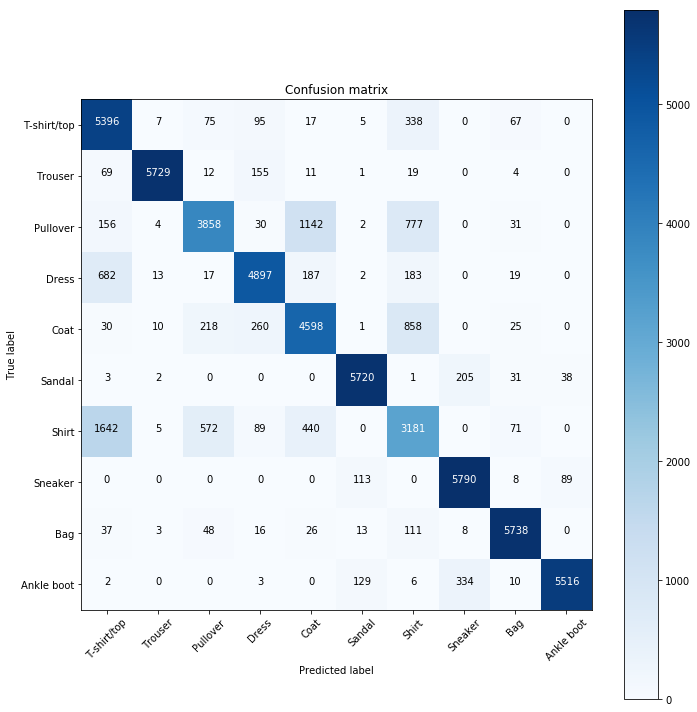

In [11]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
 
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


names = (
    'T-shirt/top'
    ,'Trouser'
    ,'Pullover'
    ,'Dress'
    ,'Coat'
    ,'Sandal'
    ,'Shirt'
    ,'Sneaker'
    ,'Bag'
    ,'Ankle boot'
)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cmt, names)